# Testes com extração Valor.xls
Extração realizada no DW, consulta Dashboard Laudos - Variação US$/kg

DashBoard Laudos - Variação US$/kg 3 meses

{MES REGIS}=Out 2017:201710, Nov 2017:201711, Dez 2017:201712 E {DIA BASE REGIS}=07 E {PESO LIQ MERC IMP} >= 100



In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
caminho = os.path.join('..', 'app', 'datasources')
for name in os.listdir(caminho):
    if 'xls' in name: print(name)

NCM.xlsx
v111518.xlsx
v12.xlsx
v1324b.xlsx
v22263031.xlsx
v7b.xlsx


In [2]:
import MySQLdb

host = os.environ.get('LAUDOS')
user = os.environ.get('USER_LAUDOS')
password = os.environ.get('PASS_LAUDOS')

db = MySQLdb.connect(host, user, password)

In [14]:
sql = 
pd.read_sql('SELECT * FROM LAUDOS.relatorios r WHERE r.id = %s', con=db, params=[1])

,id,nome,sql,tipo
0,1,Total por Servidor,"SELECT YEAR(dataPedido) as Ano_Solicitacao, s...",1


In [15]:
pd.read_sql('SELECT * FROM LAUDOS.relatorios r WHERE r.nome like "Total%"', con=db)

,id,nome,sql,tipo
0,1,Total por Servidor,"SELECT YEAR(dataPedido) as Ano_Solicitacao, s...",1
1,2,Total por Capítulo NCM,"SELECT YEAR(dataPedido) as Ano_Solicitacao, SU...",1
2,3,Total por Setor,"SELECT YEAR(dataPedido) as Ano_Solicitacao, ...",1
3,4,Total por Terminal,"SELECT YEAR(dataPedido) as Ano_Solicitacao, ...",1
4,5,Total por Tipo (SAT/LAB),"SELECT YEAR(dataPedido) as Ano_Solicitacao, ...",1
5,6,Total por país de Origem,"SELECT YEAR(dataPedido) as Ano_Solicitacao, o....",1
6,7,Total por tipo de declaração,"SELECT YEAR(dataPedido) as Ano_Solicitacao, ...",1
7,12,Total por Assistente,"SELECT YEAR(dataPedido) as Ano_Solicitacao, ...",1
8,14,Total por parecer,"select year(s.dataPedido) as Ano_Solicitacao, ...",1
9,15,Total com parecer discordante por Setor,"select year(s.dataPedido) as Ano_Solicitacao, ...",1


In [2]:
df_valor7 = pd.read_excel(os.path.join(caminho, 'valor7.xlsx'), header=4)

In [3]:
df_valor12 = pd.read_excel(os.path.join(caminho, 'valor12.xlsx'), header=4)

In [4]:
df_valor7.head()

,MES REGIS,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
0,Out 2017,1717666045,70,13,1.887671
1,Out 2017,1717666045,85,13,2.357686
2,Out 2017,1717666037,70,13,0.365931
3,Out 2017,1717666029,39,13,1.113465
4,Out 2017,1717666010,88,13,123.998856


In [5]:
df_valor12.head()

,MES REGIS,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
0,Out 2017,1717264591,39,7,93.576613
1,Out 2017,1717264591,40,7,19.260949
2,Out 2017,1717264591,45,7,100.031250
3,Out 2017,1717264591,56,7,15.039062
4,Out 2017,1717264591,73,7,12.114140


In [6]:
df_valor = pd.concat([df_valor7, df_valor12])

In [7]:
def get_valor_capncnm(pdf, capncm):
    return pdf[pdf['COD CAPIT NCM'] == capncm]['PRECO DOLAR /Kg IMP']

In [8]:
df_valor[df_valor['COD CAPIT NCM'] == 70].describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,1.145000e+03,1145.0,1145.000000,1145.000000
mean,1.720058e+09,70.0,10.448035,342.716349
std,1.409156e+06,0.0,2.967652,3192.556146
min,1.717260e+09,70.0,7.000000,0.175000
25%,1.719236e+09,70.0,7.000000,2.833185
50%,1.719657e+09,70.0,13.000000,12.495642
75%,1.721326e+09,70.0,13.000000,37.071429
max,1.721747e+09,70.0,13.000000,74293.333333


In [9]:
df_valor.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,8.796700e+04,87967.000000,87967.000000,8.796700e+04
mean,1.719968e+09,66.154831,10.478986,1.899843e+04
std,1.392786e+06,23.709454,2.961532,1.455525e+06
min,1.717260e+09,1.000000,7.000000,0.000000e+00
25%,1.719225e+09,40.000000,7.000000,5.697386e+00
50%,1.719638e+09,76.000000,13.000000,2.299241e+01
75%,1.721322e+09,85.000000,13.000000,1.374544e+02
max,1.721747e+09,97.000000,13.000000,3.294620e+08


In [10]:
def remove_outliers(df, campo):
    return df[np.abs(df[campo] - df[campo].mean()) <= (2 * df[campo].std())]

def get_valor_capncnm2(df, capncm):
    df = df[df['COD CAPIT NCM'] == capncm]
    return remove_outliers(df, 'PRECO DOLAR /Kg IMP')['PRECO DOLAR /Kg IMP']

In [11]:
df_valor2 = remove_outliers(df_valor, 'PRECO DOLAR /Kg IMP')

In [12]:
df_valor2.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP
count,8.791600e+04,87916.000000,87916.000000,8.791600e+04
mean,1.719968e+09,66.168195,10.479298,1.933359e+03
std,1.392893e+06,23.703107,2.961482,4.285617e+04
min,1.717260e+09,1.000000,7.000000,0.000000e+00
25%,1.719225e+09,40.000000,7.000000,5.692333e+00
50%,1.719638e+09,76.000000,13.000000,2.295441e+01
75%,1.721322e+09,85.000000,13.000000,1.369941e+02
max,1.721747e+09,97.000000,13.000000,2.908500e+06


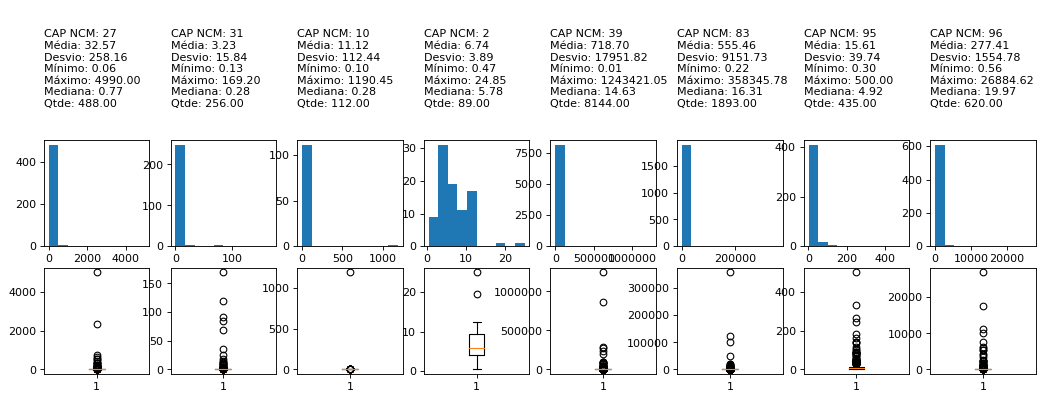

In [13]:
def resumo(pdf):
    capsncm = [27, 31, 10, 2, 39, 83, 95, 96]
    cols = len(capsncm)
    i = 1
    plt.figure(figsize=(16, 6), dpi=80)
    for cap in capsncm:
        df = get_valor_capncnm(pdf, cap)
        ax = plt.subplot(3, cols, i)
        ax.axis('off')
        text = f'CAP NCM: {cap}\n' + \
               f'Média: {df.mean():.2f}\n' + \
               f'Desvio: {df.std():.2f}\n' + \
               f'Mínimo: {df.min():.2f}\n' + \
               f'Máximo: {df.max():.2f}\n' + \
               f'Mediana: {df.median():.2f}\n' + \
               f'Qtde: {df.count():.2f}\n'
        plt.text(0, 0, s=text)
        plt.subplot(3, cols, i + cols)
        plt.hist(df, bins=10)
        plt.subplot(3, cols, i + cols * 2)
        plt.boxplot(df)
        i +=1

    plt.show()
resumo(df_valor2)

In [14]:
df = get_valor_capncnm(df_valor, 95)
df.describe()

count    435.000000
mean      15.609951
std       39.740086
min        0.301151
25%        1.898950
50%        4.920814
75%       11.774545
max      500.000000
Name: PRECO DOLAR /Kg IMP, dtype: float64

In [15]:
df_valor7b = pd.read_excel(os.path.join(caminho, 'valor7b.xlsx'), header=4)

In [16]:
df_valor7b.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,1.945000e+04,19450.000000,19450.0,19450.000000,1.945000e+04
mean,1.720198e+09,62.598149,7.0,46.565275,5.350604e+04
std,1.109372e+06,25.789028,0.0,383.460605,7.455989e+05
min,1.717260e+09,2.000000,7.0,0.001452,1.000000e+02
25%,1.719226e+09,39.000000,7.0,2.656296,4.175250e+02
50%,1.719281e+09,73.000000,7.0,7.535577,2.150000e+03
75%,1.721302e+09,85.000000,7.0,20.784318,1.314284e+04
max,1.721351e+09,97.000000,7.0,32515.071322,5.311300e+07


In [17]:
df_valor13b = pd.read_excel(os.path.join(caminho, 'valor1324b.xlsx'), header=4)

In [18]:
df_valor13b.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,4.296900e+04,42969.000000,42969.000000,42969.000000,4.296900e+04
mean,1.719607e+09,62.593661,17.009705,47.030194,6.328319e+04
std,1.405842e+06,25.751687,5.294306,514.702506,9.804905e+05
min,1.717591e+09,1.000000,13.000000,0.007694,1.000000e+02
25%,1.718341e+09,39.000000,13.000000,2.656000,4.140000e+02
50%,1.719634e+09,73.000000,13.000000,7.461090,2.111388e+03
75%,1.720443e+09,85.000000,24.000000,21.023414,1.407780e+04
max,1.722332e+09,97.000000,24.000000,44869.015635,8.288853e+07


In [19]:
df_valorb = pd.concat([df_valor7b, df_valor13b])

In [20]:
pd.options.display.float_format = '{:20,.2f}'.format
df_valorb.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,"62,419.00","62,419.00","62,419.00","62,419.00","62,419.00"
mean,"1,719,791,331.89",62.60,13.89,46.89,"60,236.59"
std,"1,348,718.11",25.76,6.39,477.69,"913,801.56"
min,"1,717,259,814.00",1.00,7.00,0.00,100.00
25%,"1,718,392,708.00",39.00,7.00,2.66,414.89
50%,"1,719,631,125.00",73.00,13.00,7.48,"2,121.04"
75%,"1,721,281,841.00",85.00,24.00,20.96,"13,859.00"
max,"1,722,331,609.00",97.00,24.00,"44,869.02","82,888,527.00"


In [21]:
def remove_outlierscaps(pdf):
    dfcaps = []
    for capncm in pdf['COD CAPIT NCM'].unique():
        df = pdf[pdf['COD CAPIT NCM'] == capncm]
        fdf = df[np.abs(df['PRECO DOLAR /Kg IMP'] - df['PRECO DOLAR /Kg IMP'].mean()) <= (2 * df['PRECO DOLAR /Kg IMP'].std())]
        dfcaps.append(fdf)
    return pd.concat(dfcaps)
    
df_valorc = remove_outlierscaps(df_valorb)

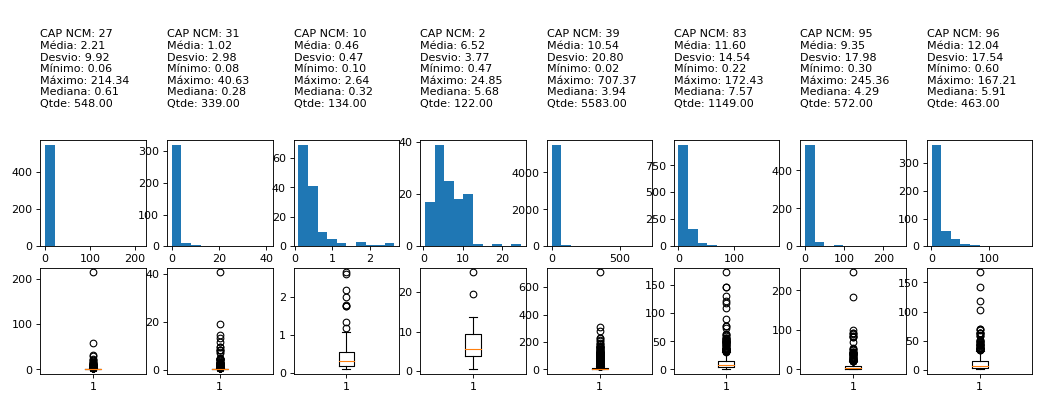

In [22]:
resumo(df_valorb)

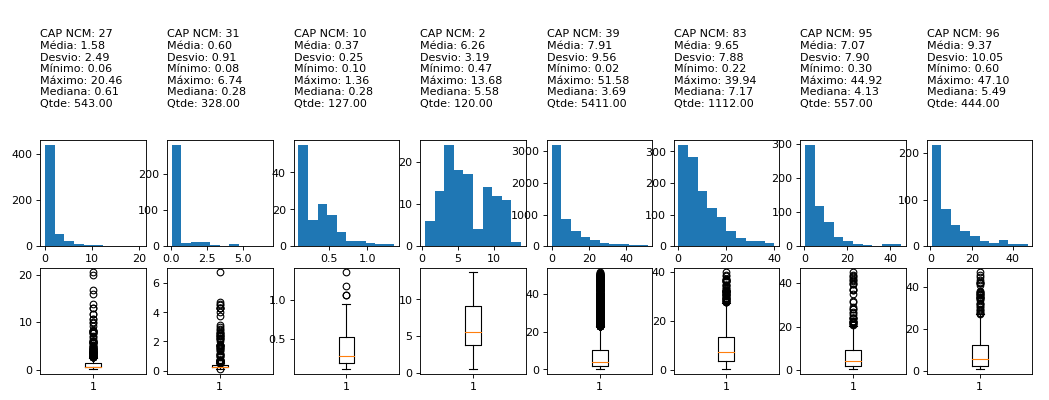

In [23]:
resumo(df_valorc)

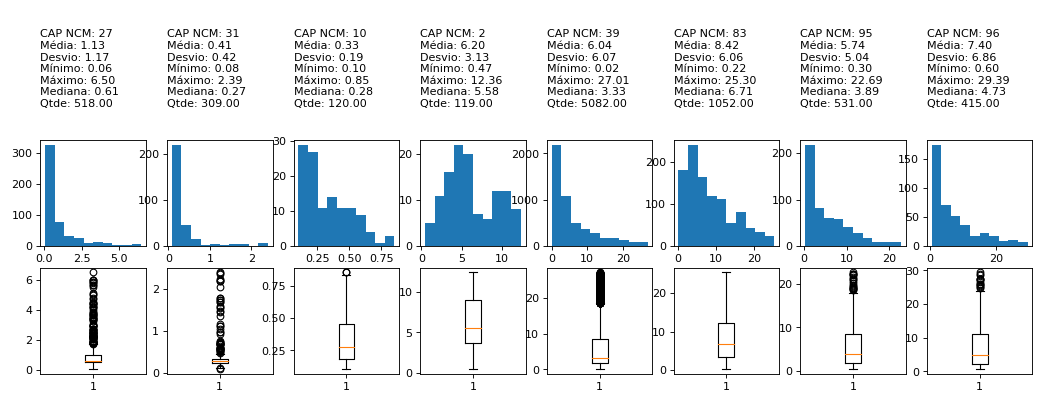

In [24]:
df_valord = remove_outlierscaps(df_valorc)
resumo(df_valord)

In [25]:
valores = get_valor_capncnm(df_valorc, 96)
valores.describe()

count                 444.00
mean                    9.37
std                    10.05
min                     0.60
25%                     2.26
50%                     5.49
75%                    12.23
max                    47.10
Name: PRECO DOLAR /Kg IMP, dtype: float64

In [26]:
valoresb = valores[np.abs(valores - valores.mean()) <= (2 * valores.std())]
valoresb.describe()

count                 415.00
mean                    7.40
std                     6.86
min                     0.60
25%                     2.12
50%                     4.73
75%                    11.06
max                    29.39
Name: PRECO DOLAR /Kg IMP, dtype: float64

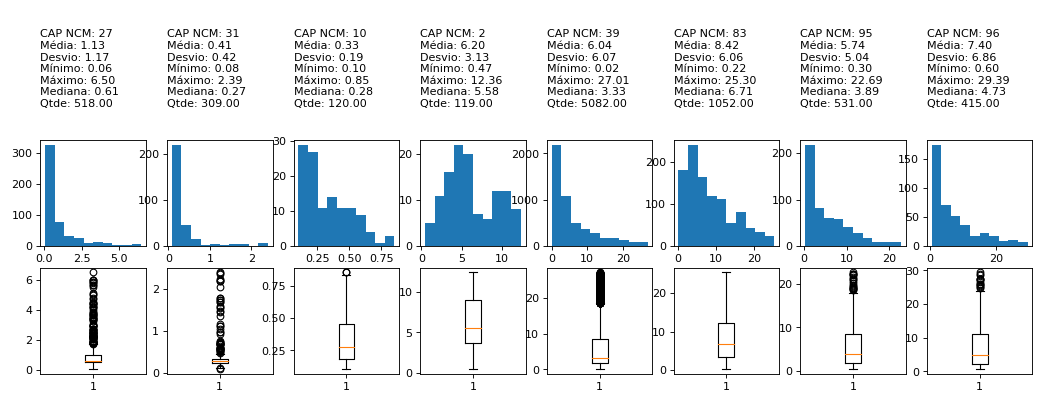

In [27]:
def resumo2(pdf):
    capsncm = [27, 31, 10, 2, 39, 83, 95, 96]
    cols = len(capsncm)
    i = 1
    plt.figure(figsize=(16, 6), dpi=80)
    for cap in capsncm:
        valores = get_valor_capncnm(pdf, cap)
        df = valores[np.abs(valores - valores.mean()) <= (2 * valores.std())]
        ax = plt.subplot(3, cols, i)
        ax.axis('off')
        text = f'CAP NCM: {cap}\n' + \
               f'Média: {df.mean():.2f}\n' + \
               f'Desvio: {df.std():.2f}\n' + \
               f'Mínimo: {df.min():.2f}\n' + \
               f'Máximo: {df.max():.2f}\n' + \
               f'Mediana: {df.median():.2f}\n' + \
               f'Qtde: {df.count():.2f}\n'
        plt.text(0, 0, s=text)
        plt.subplot(3, cols, i + cols)
        plt.hist(df, bins=10)
        plt.subplot(3, cols, i + cols * 2)
        plt.boxplot(df)
        i +=1

    plt.show()
resumo2(df_valorc)

In [28]:
df_valorc.describe()

,NUM DI,COD CAPIT NCM,DIA BASE REGIS,PRECO DOLAR /Kg IMP,PESO LIQ MERC IMP
count,"61,007.00","61,007.00","61,007.00","61,007.00","61,007.00"
mean,"1,719,789,663.40",62.72,13.89,28.36,"61,599.79"
std,"1,348,271.27",25.72,6.39,121.67,"924,271.51"
min,"1,717,259,814.00",1.00,7.00,0.00,100.00
25%,"1,718,392,387.00",39.00,7.00,2.60,439.78
50%,"1,719,630,900.00",73.00,13.00,7.14,"2,273.45"
75%,"1,721,281,671.00",85.00,24.00,19.60,"14,268.31"
max,"1,722,331,609.00",97.00,24.00,"17,782.36","82,888,527.00"
